#Colentando Dados de Estados Brasileiros

In [ ]:
import  pandas as pd #Biblioteca de tratamento e leitura de dados
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin=1'  )

In [ ]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


#Coletando dado dos clientes

In [ ]:
clients = pd.read_excel('dados_clientes.xlsx')
clients.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102,111,Masculino,23
1,2,115,135,Masculino,7
2,3,115,136,Masculino,4
3,4,140,167,Feminino,24
4,5,130,158,Masculino,26


#Coletando a idade dos clientes

In [ ]:
age = pd.read_csv('idade_clientes.csv', sep=';',encoding='latin-1')
age.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Preparação de dados
## É a etapa aonde os dados são limpos e se tornam aptos a analise. Essa etapa tem como objetivo de reduzir descrepancias, evitar valores nulos  indicar anomalias e preencher lacunas, 

#Analizando  as variaveis das base de dados

In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  547 non-null    int64 
 1   peso        547 non-null    int64 
 2   colesterol  547 non-null    int64 
 3   genero      547 non-null    object
 4   id_estado   547 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 21.5+ KB


In [ ]:
clients.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,547.000000,547.000000,547.000000
mean,274.00000,143.572212,170.433272,13.833638
std,158.04957,30.837275,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
  estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
age.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


# Analisando dados ausentes

In [ ]:
#verificando os valores nulos da base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clients.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
age.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
#Verificando os valores registros de valores  nulos
clients.loc[clients['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado


#eliminando dados ausentes

In [ ]:
clients.dropna(subset=['peso'],inplace=True) #para eliminar o registro. implace = true siginifica que quer alterar aquele frame

In [ ]:
clients.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clients.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

###alterando dados  por outras medidas

In [ ]:
clients.describe

<bound method NDFrame.describe of      id_cliente  peso  colesterol     genero  id_estado
0             1   102         111  Masculino         23
1             2   115         135  Masculino          7
2             3   115         136  Masculino          4
3             4   140         167   Feminino         24
4             5   130         158  Masculino         26
..          ...   ...         ...        ...        ...
542         543   172         207  Masculino         22
543         544   129         157  Masculino          1
544         545   107         115  Masculino          6
545         546   117         147  Masculino         20
546         547   148         176  Masculino          8

[547 rows x 5 columns]>

In [ ]:
# realizando a média e  mediana da variavel peso
media=clients.peso.mean()
mediana =clients.peso.median()

In [ ]:
 print(f"O valor das medias dos pesos é {media} \n o valor da mediana é {mediana}")

O valor das medias dos pesos é 143.57221206581352 
 o valor da mediana é 140.0


In [ ]:
round(media,2) #arredondamento da variavel media para 2 casas pós virgula

143.57

In [ ]:
#preencher valores auzentes pela média
clients.peso.fillna(round(media,2),inplace=True)

In [ ]:
clients.isna().sum() #verificando se tem algum valor null

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clients.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

#Substituindo variavel categorica
###Quando temos uma variavel categorica o que fazemos é substituir pela variavle mais usada

In [ ]:
  print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
estados.pais.fillna('Brasil',inplace=True)

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

#Analizando a  distribuição de dados

In [ ]:
import matplotlib.pyplot as plt

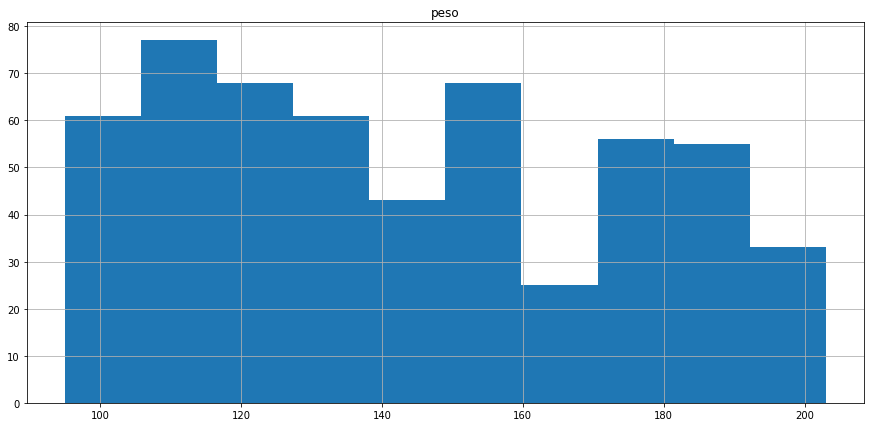

In [ ]:
clients.hist(column='peso',figsize=(15,7))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61b652d350>]],
      dtype=object)

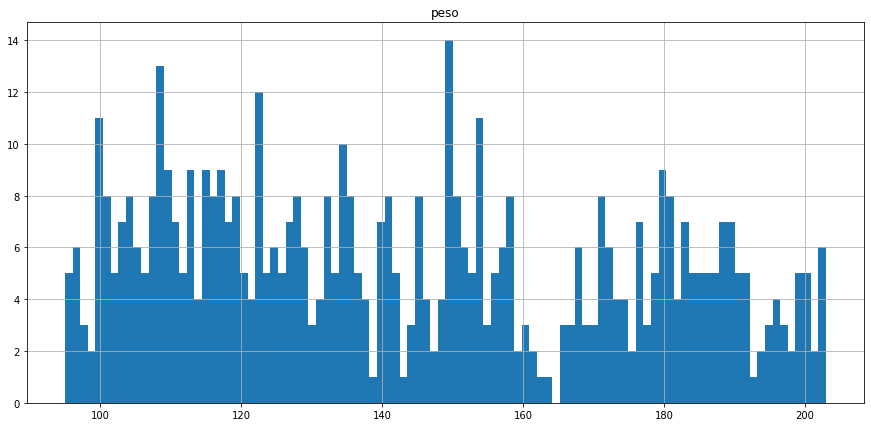

In [ ]:
clients.hist(column='peso',figsize=(15,7),bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61b63bd2d0>]],
      dtype=object)

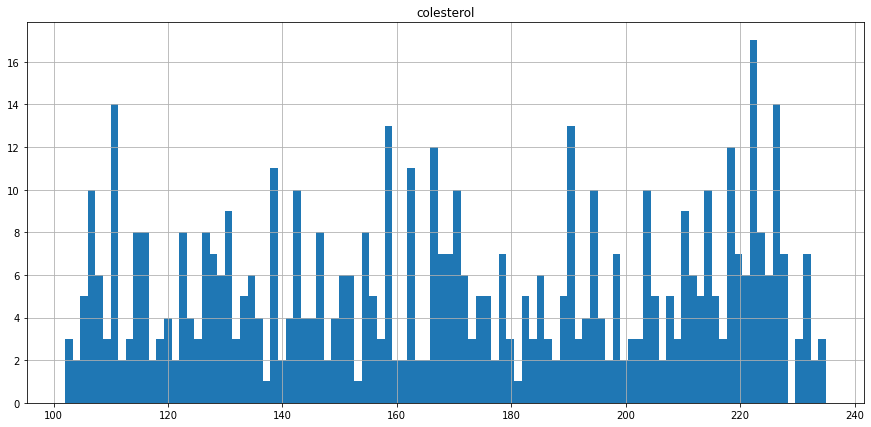

In [ ]:
clients.hist(column='colesterol',figsize=(15,7),bins=100)

In [ ]:
#Criando um identificador para a váriavel genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clients['genero_number'] = LE.fit_transform(clients['genero']) 

In [ ]:
clients

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102,111,Masculino,23,1
1,2,115,135,Masculino,7,1
2,3,115,136,Masculino,4,1
3,4,140,167,Feminino,24,0
4,5,130,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172,207,Masculino,22,1
543,544,129,157,Masculino,1,1
544,545,107,115,Masculino,6,1
545,546,117,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61a6dd5210>]],
      dtype=object)

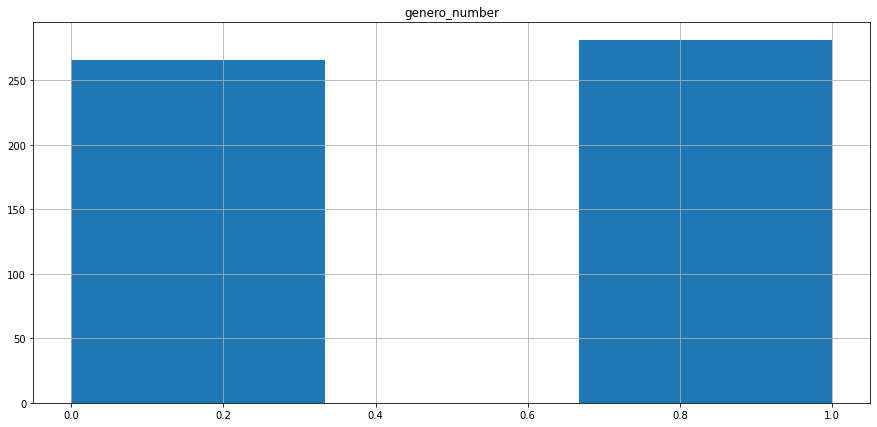

In [ ]:
clients.hist(column='genero_number',figsize=(15,7), bins=3)

#junções de dados coletados

In [ ]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clients[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102,111,Masculino,23,1
1,2,115,135,Masculino,7,1
2,3,115,136,Masculino,4,1
3,4,140,167,Feminino,24,0
4,5,130,158,Masculino,26,1


In [ ]:
clients_estados = pd.merge(clients,estados,on='id_estado')
clients_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115,136,Masculino,4,1,Amazonas,am,Brasil
65,4,140,167,Feminino,24,0,Santa Catarina,sc,Brasil
87,5,130,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,172,207,Masculino,22,1,Rondônia,ro,Brasil
478,544,129,157,Masculino,1,1,Acre,ac,Brasil
178,545,107,115,Masculino,6,1,Ceará,ce,Brasil
396,546,117,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
#realiza  junção entre  clientes e  idades
base_completa = pd.merge(clients_estados,age,on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
542,543,172,207,Masculino,22,1,Rondônia,ro,Brasil,20
543,544,129,157,Masculino,1,1,Acre,ac,Brasil,66
544,545,107,115,Masculino,6,1,Ceará,ce,Brasil,36
545,546,117,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


#Organizando a base de dados
###podemos realizar varias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas

In [ ]:
#Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number':'cod_genero'},  inplace=True)
base_completa


,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
#Alterando as linhas da variavel sigla_estado para maiusculo
base_completa.sigla_estado.str.upper()

0      RR
18     DF
40     AM
65     SC
87     SE
       ..
443    RO
478    AC
178    CE
396    RN
123    ES
Name: sigla_estado, Length: 547, dtype: object

In [ ]:
#inserindo a alteração realizada
base_completa['sigla_estado']= base_completa.sigla_estado.str.upper()

#Alterando disposição das colunas do arquivo de dados
###Vamos  alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização


In [ ]:
base_completa[['cod_cliente','genero','idade', 'peso','colesterol', 'id_estado','estado','sigla_estado','pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102,111,23,Roraima,RR,Brasil
18,2,Masculino,28,115,135,7,Distrito Federal,DF,Brasil
40,3,Masculino,62,115,136,4,Amazonas,AM,Brasil
65,4,Feminino,55,140,167,24,Santa Catarina,SC,Brasil
87,5,Masculino,44,130,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,Masculino,20,172,207,22,Rondônia,RO,Brasil
478,544,Masculino,66,129,157,1,Acre,AC,Brasil
178,545,Masculino,36,107,115,6,Ceará,CE,Brasil
396,546,Masculino,57,117,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa = base_completa[['cod_cliente','genero','idade','peso','colesterol','id_estado' ,'estado','sigla_estado','pais']].reset_index(drop=True)

In [ ]:
base_completa[:5]


,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130,158,26,Sergipe,SE,Brasil


#Analise de dado 

##É a parte  da etapa aonde selecionamos os algoritimos de machine learning que serão inseridos para alcançar o resultado
##Para esse trabalho, vamos realizar um agrupamento  de pessoas com base no colesterol,peso e idade das pessoas

#Aplicando o metodo cotovelo
###Vamos inicializar o número de clusters necessarios para  realizaro agrupamentp

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calcular_wcss(dados_cliente):
  wcss= []
  for k in range(1,11):
    kmeans = KMeans(n_clusters= k)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss
  wcss.show()

In [ ]:
dados_cliente = base_completa [['peso','colesterol']]
dados_cliente.head()

,peso,colesterol
0,102,111
1,115,135
2,115,136
3,140,167
4,130,158


In [ ]:
wcss_clientes = calcular_wcss(dados_cliente) 

In [ ]:
wcss_clientes

[1355958.2120658136,
 330523.8957979569,
 139730.7998295347,
 81333.6550778757,
 53820.54620122939,
 37432.54594135556,
 27634.302325594916,
 22010.37735538258,
 17198.997682760277,
 14626.665699080997]

In [ ]:
#Vizualizando os dados  obtidos por WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster{i} possui o valor wcss de {wcss_clientes[i]}')

O cluster0 possui o valor wcss de 1355958.2120658136
O cluster1 possui o valor wcss de 330523.8957979569
O cluster2 possui o valor wcss de 139730.7998295347
O cluster3 possui o valor wcss de 81333.6550778757
O cluster4 possui o valor wcss de 53820.54620122939
O cluster5 possui o valor wcss de 37432.54594135556
O cluster6 possui o valor wcss de 27634.302325594916
O cluster7 possui o valor wcss de 22010.37735538258
O cluster8 possui o valor wcss de 17198.997682760277
O cluster9 possui o valor wcss de 14626.665699080997


#Visualizando o Gráfico cotovelo

In [ ]:
import plotly.express as px #grafico de pixels
import plotly.offline as py
import plotly.graph_objects as go #Para criação e caracterização de graficos

In [ ]:
grafico_wcss= px.line(x= range(1,11),y=wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculo de wcss',
                  xaxis_title='Numero de clusters',
                  yaxis_title = 'Valor do WCSS',
                  template = 'plotly_white'
                  )
fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102,111,23,Roraima,RR,Brasil,3,Baixo risco
1,2,Masculino,28,115,135,7,Distrito Federal,DF,Brasil,3,Baixo risco
2,3,Masculino,62,115,136,4,Amazonas,AM,Brasil,3,Baixo risco
3,4,Feminino,55,140,167,24,Santa Catarina,SC,Brasil,1,Alto risco
4,5,Masculino,44,130,158,26,Sergipe,SE,Brasil,1,Alto risco
...,...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172,207,22,Rondônia,RO,Brasil,0,Medio risco
543,544,Masculino,66,129,157,1,Acre,AC,Brasil,1,Alto risco
544,545,Masculino,36,107,115,6,Ceará,CE,Brasil,3,Baixo risco
545,546,Masculino,57,117,147,20,Rio Grande do Norte,RN,Brasil,1,Baixo risco


#Calculando os centroides dos clusters

In [ ]:
centroide_clusters = kmeans_clientes.cluster_centers_
centroide_clusters

array([[184.97297297, 219.52027027,  42.84459459],
       [129.19858156, 156.21985816,  41.62411348],
       [153.98230088, 188.34513274,  43.15929204],
       [107.17931034, 120.19310345,  43.5862069 ]])

In [ ]:
dados_cliente

,peso,colesterol
0,102,111
1,115,135
2,115,136
3,140,167
4,130,158
...,...,...
542,172,207
543,129,157
544,107,115
545,117,147


#Aqui temos os centroides dos 3 cluster de acordo com os atributos. Nesse exemplo vemos os centroides  de 'peso' 'colesterol' 'idade' respectivamente

In [ ]:
grafico = px.scatter(x=base_completa['peso'], y= base_completa['colesterol'],color= base_completa['cluster'])
grafico_centroide = px.scatter(x= centroide_clusters[:,0], y= centroide_clusters[:,1], size=[7,7,7,7])
grafico_final =go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

#Vizualizando e alterando o layout do grafico

In [ ]:
grafico = px.scatter(x= base_completa['colesterol'], y= base_completa['peso'],color= base_completa['cluster']
                     )
fig = go.Figure(grafico)
fig.update_layout(title = 'Analise de cluster ', xaxis_title="Colesterol",yaxis_title= 'peso')
fig.show()

#Criando funçoes para Gerar graficos

In [ ]:
def plotar_grafico(x,y,x_label,y_label):
  grafico =px.scatter(x=x,y=y,color=base_completa['cluster'])
  fig = go.Figure(grafico)

  fig.update_layout(title='Analise de Clusters',xaxis_title= x_label,yaxis_title=y_label,)
  fig.show() 

In [ ]:
plotar_grafico(base_completa['colesterol'],base_completa['peso'],'colesterol','peso')


In [ ]:
plotar_grafico(base_completa['peso'],base_completa['colesterol'],'peso','colesterol')

In [ ]:
plotar_grafico(base_completa['peso'],base_completa['idade'],'peso','idade(x= centroide_clusters[:,0], y= centroide_clusters[:,1]')

#Segmentando cliente em
###alto risco= colesterol alto
###medio risco= colesterol semialto
###baixo risco=colesterol normal

In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y],x,y) 

In [ ]:
clusters_clientes = base_completa

In [ ]:
#seguimentando os clientes baseados na analise dos clusters
clusters_clientes.loc[clusters_clientes['cluster']==0, 'nome_cluster'] = 'Risco Alto'
clusters_clientes.loc[clusters_clientes['cluster']==2,'nome_cluster'] = 'Risco moderado alto' 
clusters_clientes.loc[clusters_clientes['cluster']==1,'nome_cluster'] = 'Risco moderado baixo'
clusters_clientes.loc[clusters_clientes['cluster']==3,'nome_cluster' ]= 'Baixo risco'

In [ ]:
clusters_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102,111,23,Roraima,RR,Brasil,3,Baixo risco
1,2,Masculino,28,115,135,7,Distrito Federal,DF,Brasil,3,Baixo risco
2,3,Masculino,62,115,136,4,Amazonas,AM,Brasil,3,Baixo risco
3,4,Feminino,55,140,167,24,Santa Catarina,SC,Brasil,1,Risco moderado baixo
4,5,Masculino,44,130,158,26,Sergipe,SE,Brasil,1,Risco moderado baixo
...,...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172,207,22,Rondônia,RO,Brasil,0,Risco Alto
543,544,Masculino,66,129,157,1,Acre,AC,Brasil,1,Risco moderado baixo
544,545,Masculino,36,107,115,6,Ceará,CE,Brasil,3,Baixo risco
545,546,Masculino,57,117,147,20,Rio Grande do Norte,RN,Brasil,1,Risco moderado baixo


#Analise dos clusters Criados

In [ ]:
#Verifica os valores de idade de todos os clusters
clusters_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Baixo risco,145.0,120.193103,10.555604,102.0,110.0,120.0,129.0,139.0
Risco Alto,148.0,219.520270,7.770054,204.0,213.0,220.0,225.0,235.0
Risco moderado alto,113.0,188.345133,9.595172,169.0,180.0,190.0,195.0,204.0
Risco moderado baixo,141.0,156.219858,10.062016,138.0,147.0,157.0,166.0,173.0


In [ ]:
#Verifica os valores de estado por cluster
clusters_clientes.groupby('nome_cluster')['estado'].describe( )

,count,unique,top,freq
nome_cluster,,,,
Baixo risco,145,27,Amazonas,11
Risco Alto,148,27,Rio Grande do Sul,9
Risco moderado alto,113,27,Minas Gerais,8
Risco moderado baixo,141,27,Piauí,10


In [ ]:
clusters_clientes.query('nome_cluster == "Alto risco "& estado == "Mato Grosso do Sul   "')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster


In [ ]:
clusters_clientes.groupby(['nome_cluster','genero'])['peso'].describe(  )

count        mean  ...     75%    max
nome_cluster         genero                        ...               
Baixo risco          Feminino    66.0  108.454545  ...  113.00  118.0
                     Masculino   79.0  106.113924  ...  110.50  118.0
Risco Alto           Feminino    62.0  186.483871  ...  192.00  203.0
                     Masculino   86.0  183.883721  ...  190.75  203.0
Risco moderado alto  Feminino    58.0  153.879310  ...  158.00  169.0
                     Masculino   55.0  154.090909  ...  158.00  169.0
Risco moderado baixo Feminino    80.0  131.137500  ...  137.00  144.0
                     Masculino   61.0  126.655738  ...  132.00  141.0

[8 rows x 8 columns]

#Exportando dados

In [ ]:
clusters_clientes.to_csv('classificacao_clientes.csv',sep = ';', encoding = 'latin1')